In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/user/Downloads/Credit risk dataset 1/credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
#import cufflinks as cf
#cf.go_offline()

#box_age = df[['loan_grade', 'loan_int_rate']]
#box_age.pivot(columns='loan_grade', values='loan_int_rate').iplot(kind='box')

Now to create a function that will impute the missing values on the loan interest column

In [8]:
def impute_int(col):
    loan_int_rate = col[0]
    loan_grade = col[1]
    if pd.isnull(loan_int_rate):
        if loan_grade == 'A':
            return 7.49
        elif loan_grade == 'B':
            return 10.99
        elif loan_grade == 'C':
            return 13.48
        elif loan_grade == 'D':
            return 15.31
        elif loan_grade == 'E':
            return 16.82
        elif loan_grade == 'F':
            return 18.54
        else:
            return 20.16
    else:
        return loan_int_rate

In [9]:
df['loan_int_rate'] = df[['loan_int_rate','loan_grade']].apply(impute_int,axis=1)

In [10]:
df.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [11]:
df1 = df.copy()

In [12]:
df1 = df1[df1['person_age'] < 90]

In [13]:
df1['person_emp_length'] = df1['person_emp_length'].fillna(df1['person_emp_length'].mean())

In [14]:
df1.drop_duplicates(inplace=True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32410 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32410 non-null  int64  
 1   person_income               32410 non-null  int64  
 2   person_home_ownership       32410 non-null  object 
 3   person_emp_length           32410 non-null  float64
 4   loan_intent                 32410 non-null  object 
 5   loan_grade                  32410 non-null  object 
 6   loan_amnt                   32410 non-null  int64  
 7   loan_int_rate               32410 non-null  float64
 8   loan_status                 32410 non-null  int64  
 9   loan_percent_income         32410 non-null  float64
 10  cb_person_default_on_file   32410 non-null  object 
 11  cb_person_cred_hist_length  32410 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


<AxesSubplot:xlabel='loan_status', ylabel='count'>

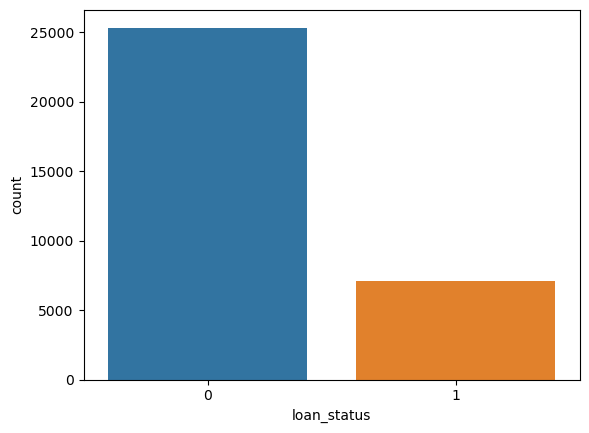

In [16]:
sns.countplot(x='loan_status',data=df1)

There are more non-defaulters than defaulters

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

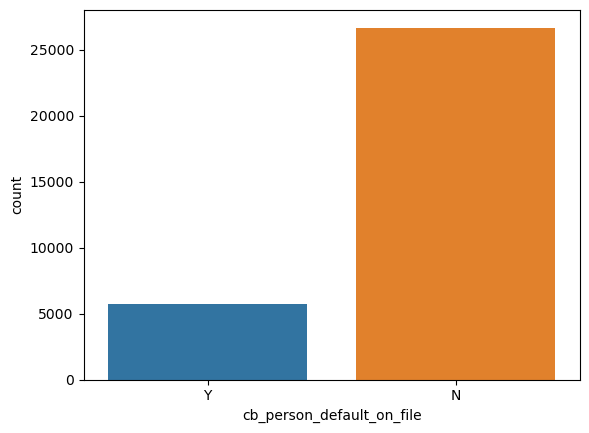

In [17]:
sns.countplot(x='cb_person_default_on_file',data=df1)

Most of the customers do not have a history of defaulting on their loans

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

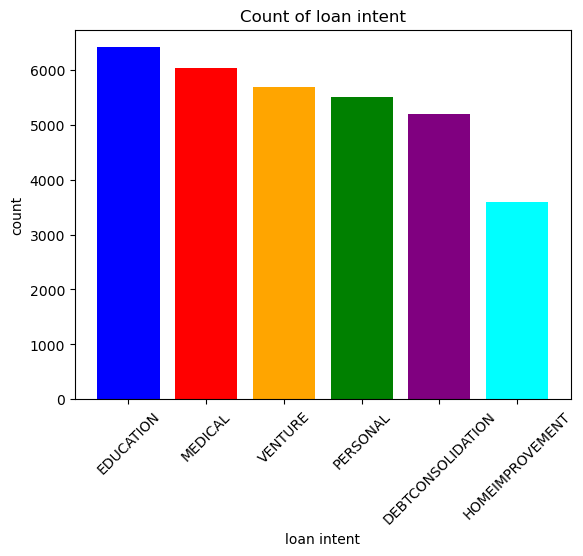

In [18]:
loan_intent_count = df1['loan_intent'].value_counts().sort_values(ascending = False)

colors = ['blue','red','orange','green','purple','cyan']

fig, ax = plt.subplots()
ax.bar(loan_intent_count.index, loan_intent_count.values,color=colors)
ax.set_title('Count of loan intent')
ax.set_xlabel('loan intent')
ax.set_ylabel('count')

plt.xticks(rotation=45)

Most loans given are used for educational purposes

(array([0, 1, 2, 3]),
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'OWN'),
  Text(2, 0, 'MORTGAGE'),
  Text(3, 0, 'OTHER')])

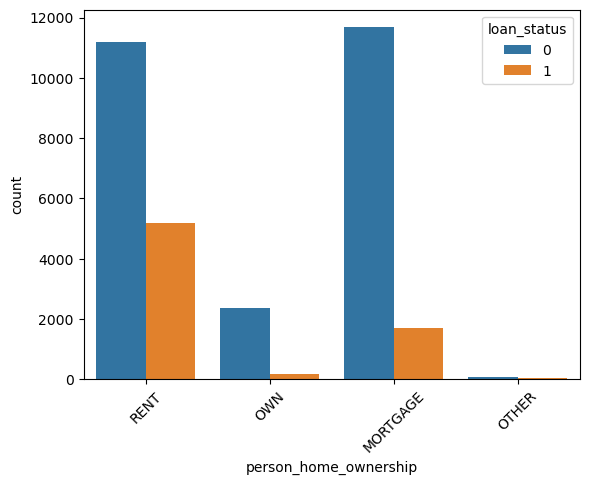

In [19]:
sns.countplot(x='person_home_ownership',data=df1,hue='loan_status')
plt.xticks(rotation=45)

People who are renting are mostly likely to default on their loans

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

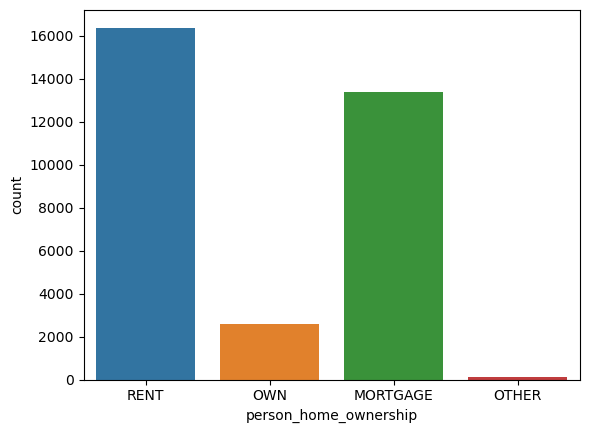

In [20]:
sns.countplot(x='person_home_ownership',data=df1)

<AxesSubplot:xlabel='person_home_ownership', ylabel='person_age'>

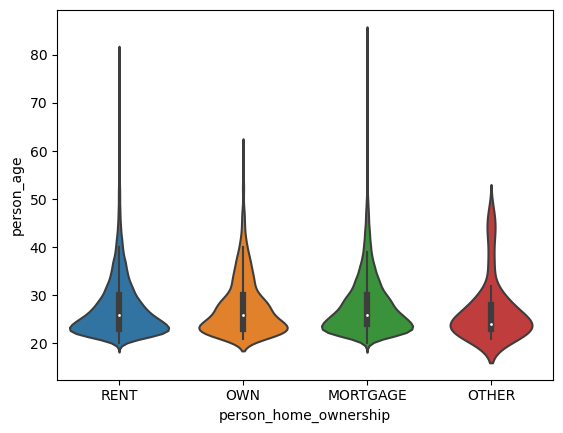

In [21]:
sns.violinplot(x='person_home_ownership',y='person_age',data=df1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='person_age', ylabel='Density'>

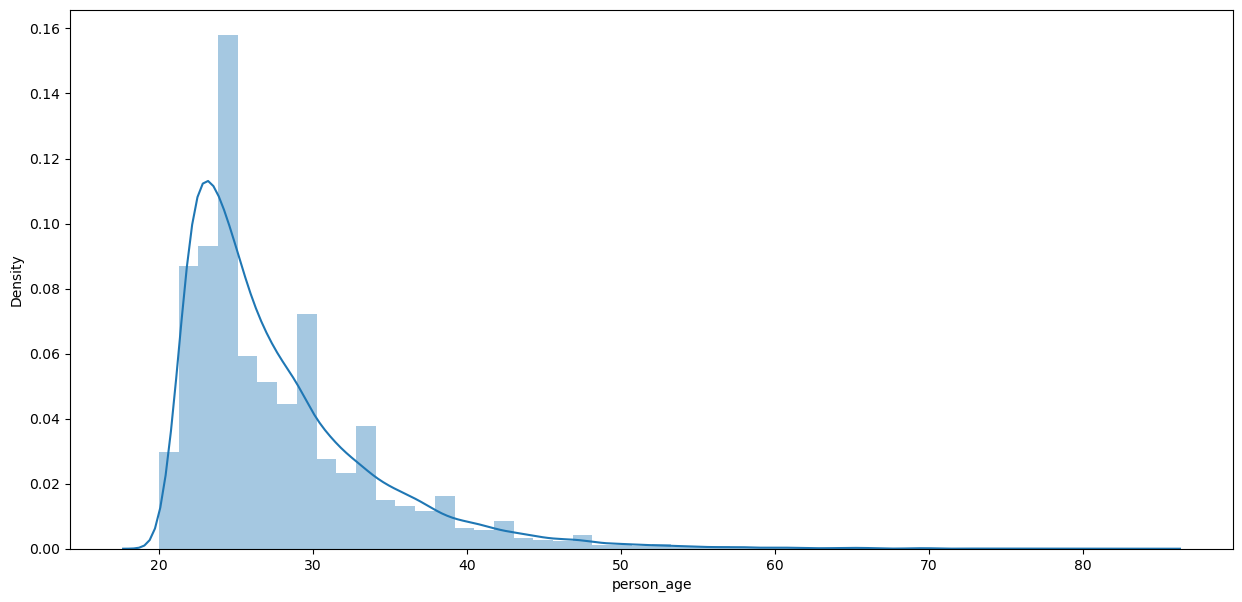

In [22]:
plt.figure(figsize=(15, 7))
sns.distplot(df1['person_age'])

The majority of customers are youug adults

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='person_income'>

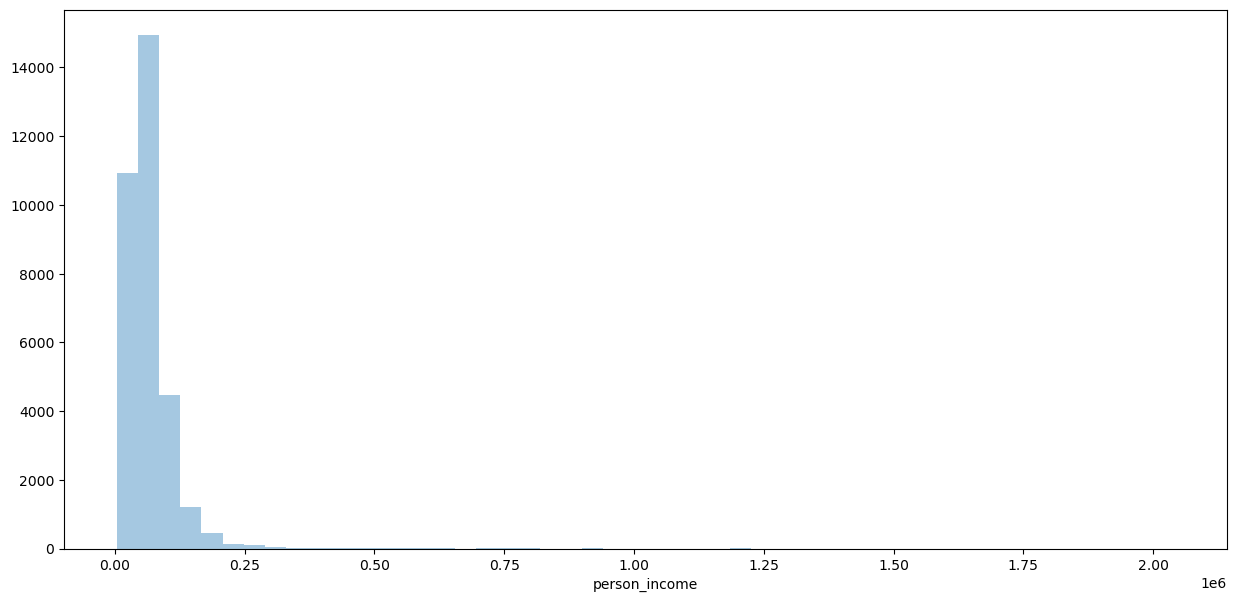

In [23]:
plt.figure(figsize=(15, 7))
sns.distplot(df1['person_income'],kde=False)

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

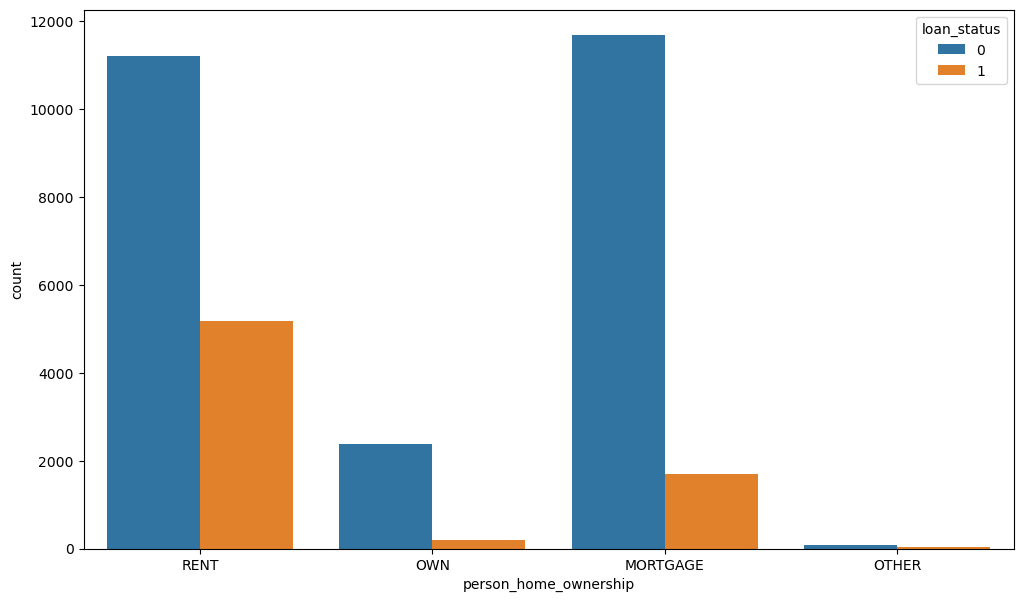

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x='person_home_ownership',data=df1,hue='loan_status')

People who renting a place to live are most likely to default on their loans

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

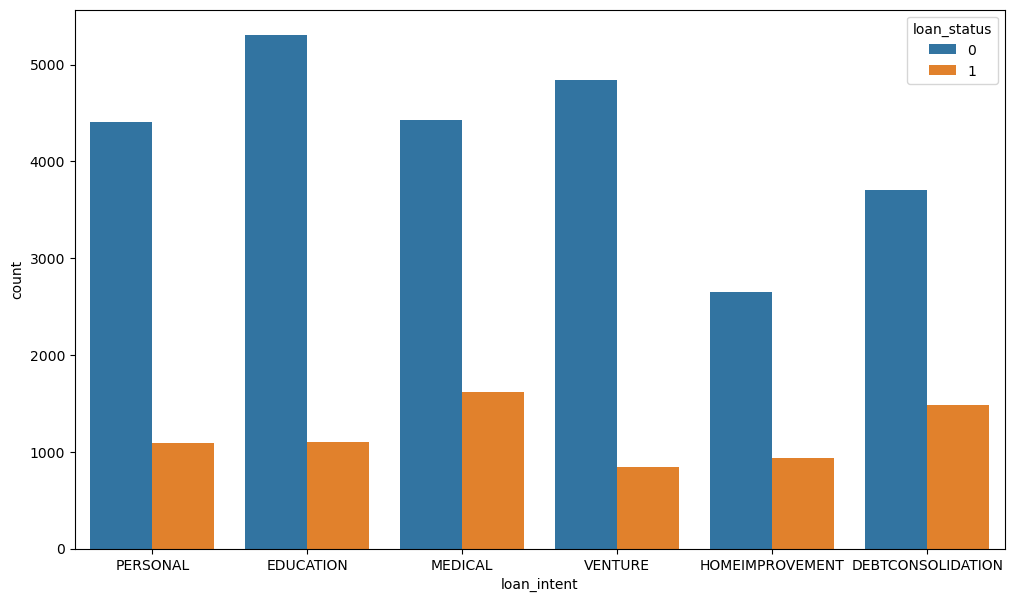

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(x='loan_intent',data=df1,hue='loan_status')

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

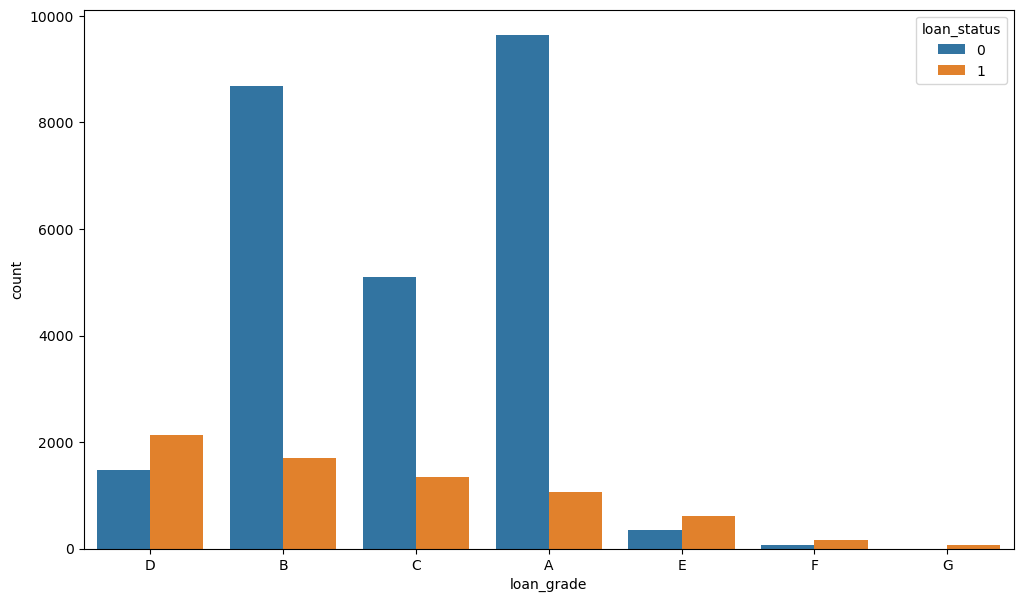

In [26]:
plt.figure(figsize=(12,7))
sns.countplot(x='loan_grade',data=df1,hue='loan_status')

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

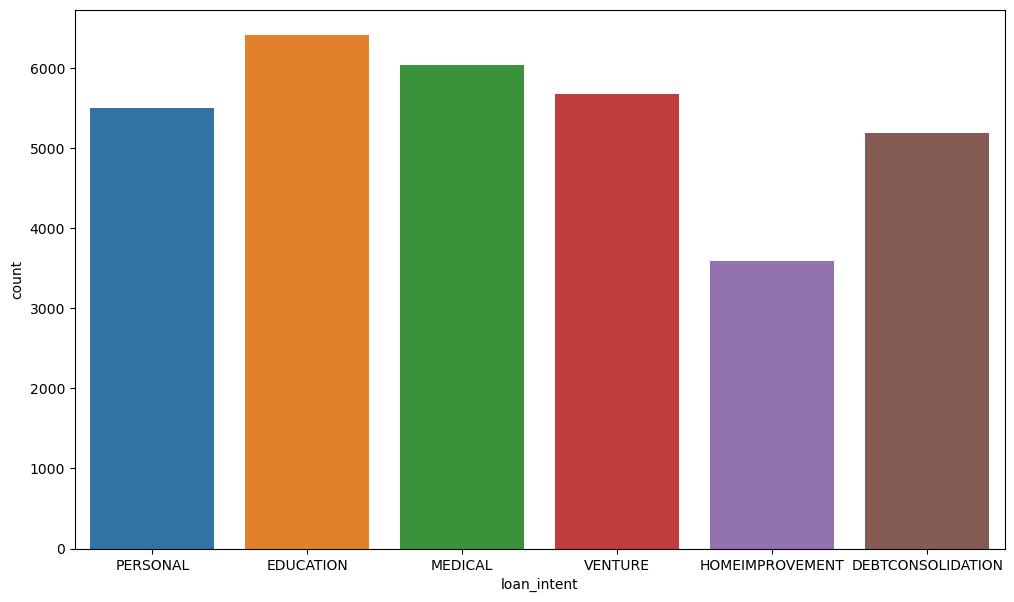

In [27]:
plt.figure(figsize=(12,7))
sns.countplot(x='loan_intent',data=df1)

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

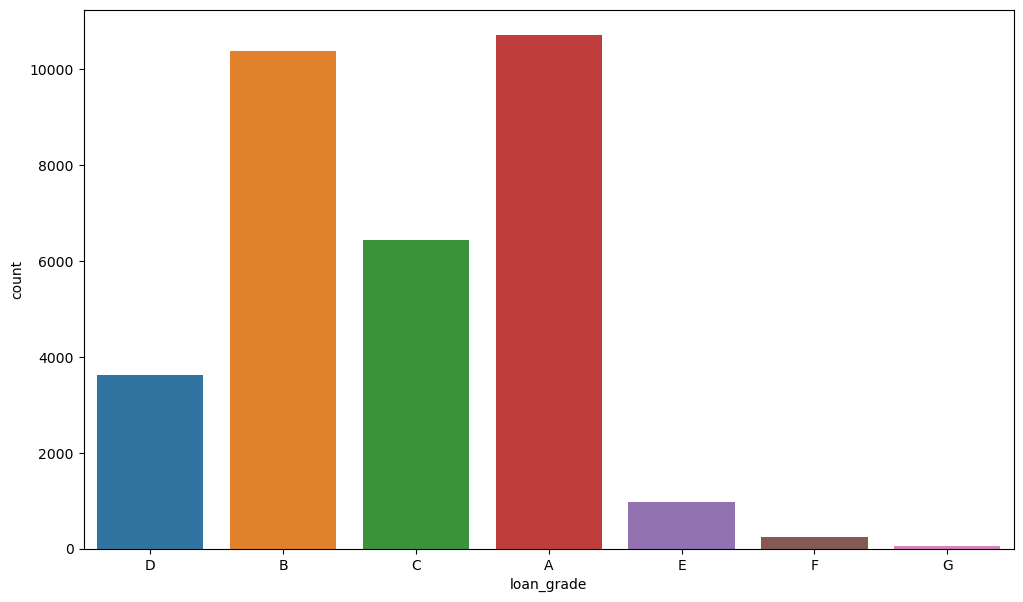

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(x='loan_grade',data=df1)

<Figure size 1500x700 with 0 Axes>

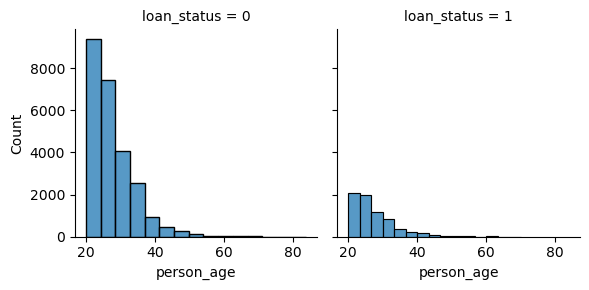

In [29]:
plt.figure(figsize=(15,7))
m = sns.FacetGrid(data=df1,col='loan_status')
m.map(sns.histplot,'person_age',bins=15)

<Figure size 1500x700 with 0 Axes>

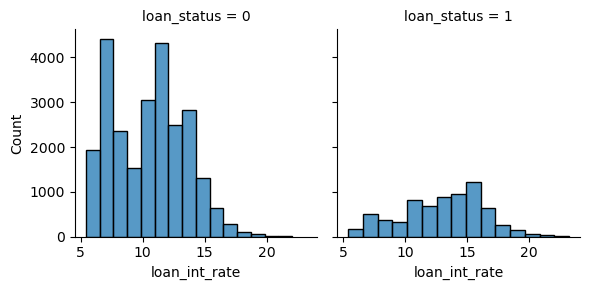

In [30]:
plt.figure(figsize=(15,7))
m = sns.FacetGrid(data=df1,col='loan_status')
m.map(sns.histplot,'loan_int_rate',bins=15)

<AxesSubplot:xlabel='loan_status', ylabel='loan_int_rate'>

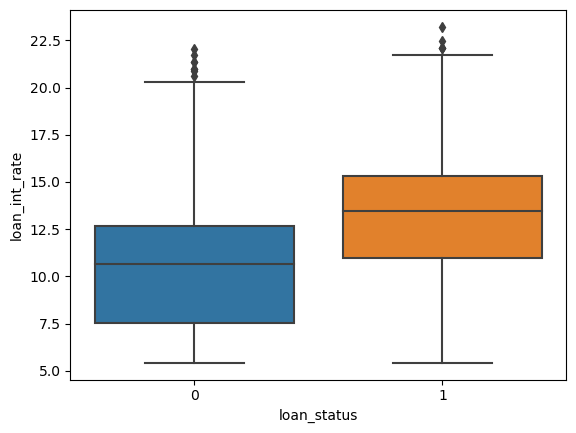

In [31]:
sns.boxplot(x='loan_status',y='loan_int_rate',data=df1)

<Figure size 1500x700 with 0 Axes>

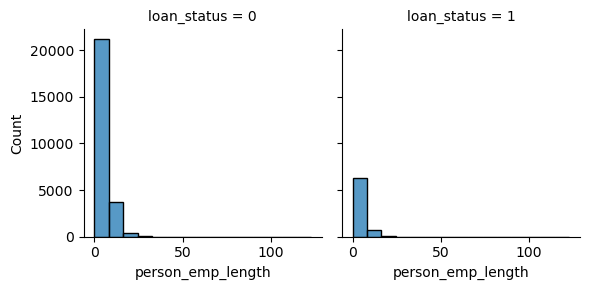

In [32]:
plt.figure(figsize=(15,7))
m = sns.FacetGrid(data=df1,col='loan_status')
m.map(sns.histplot,'person_emp_length',bins=15)

<AxesSubplot:xlabel='loan_status', ylabel='person_emp_length'>

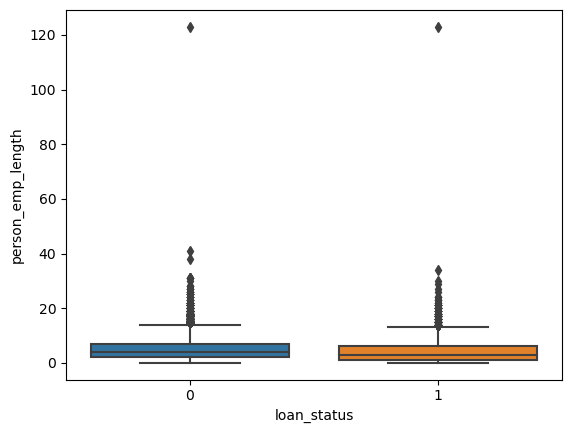

In [33]:
sns.boxplot(x='loan_status',y='person_emp_length',data=df1)

<Figure size 1500x700 with 0 Axes>

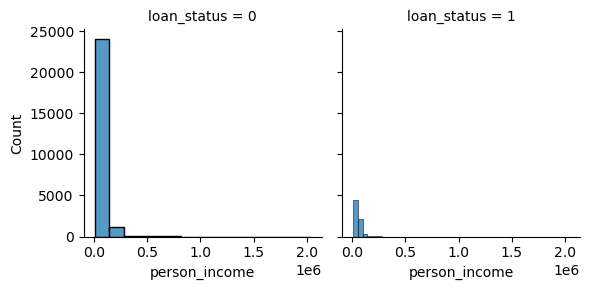

In [34]:
plt.figure(figsize=(15,7))
m = sns.FacetGrid(data=df1,col='loan_status')
m.map(sns.histplot,'person_income',bins=15)

<Figure size 1500x700 with 0 Axes>

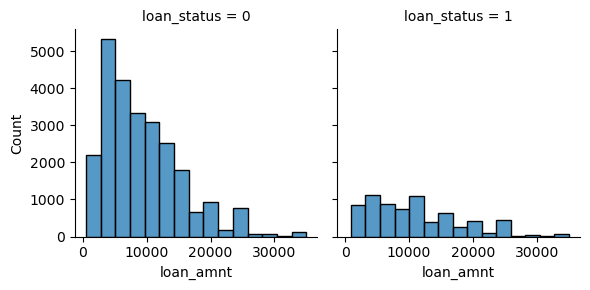

In [35]:
plt.figure(figsize=(15,7))
m = sns.FacetGrid(data=df1,col='loan_status')
m.map(sns.histplot,'loan_amnt',bins=15)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

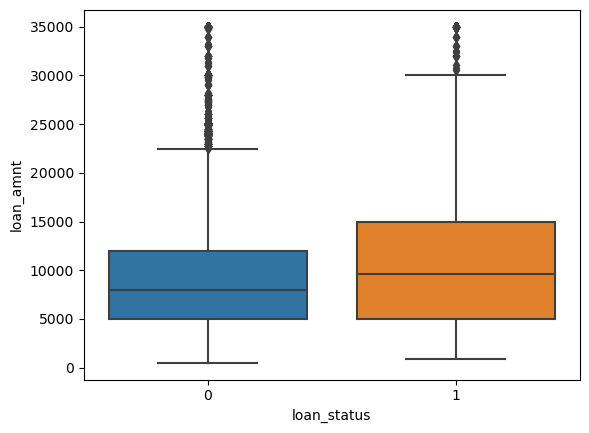

In [36]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df1)

<AxesSubplot:>

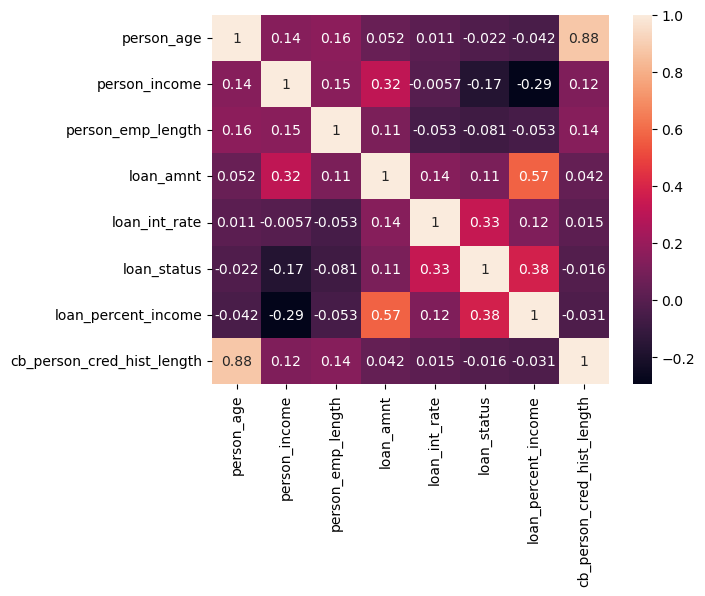

In [37]:
sns.heatmap(df1.corr(),annot=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['person_home_ownership']=le.fit_transform(df1['person_home_ownership'])
df1['loan_intent']=le.fit_transform(df1['loan_intent'])
df1['loan_grade']=le.fit_transform(df1['loan_grade'])
df1['cb_person_default_on_file']=le.fit_transform(df1['cb_person_default_on_file'])

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
minmax = MinMaxScaler()

In [41]:
X = df1.drop('loan_status',axis=1)
y = df1['loan_status']

In [42]:
X = minmax.fit_transform(X)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='softmax'))

model.add(Dense(1))

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 101)

In [48]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=80)

Epoch 1/80
811/811 [==============================] - 16s 13ms/step - loss: 0.4211 - accuracy: 0.8179 - val_loss: 0.3838 - val_accuracy: 0.8360
Epoch 2/80
811/811 [==============================] - 9s 11ms/step - loss: 0.3680 - accuracy: 0.8507 - val_loss: 0.3610 - val_accuracy: 0.8547
Epoch 3/80
811/811 [==============================] - 8s 10ms/step - loss: 0.3425 - accuracy: 0.8661 - val_loss: 0.3457 - val_accuracy: 0.8633
Epoch 4/80
811/811 [==============================] - 8s 10ms/step - loss: 0.3286 - accuracy: 0.8754 - val_loss: 0.3565 - val_accuracy: 0.8607
Epoch 5/80
811/811 [==============================] - 8s 10ms/step - loss: 0.3218 - accuracy: 0.8767 - val_loss: 0.3223 - val_accuracy: 0.8758
Epoch 6/80
811/811 [==============================] - 9s 11ms/step - loss: 0.3203 - accuracy: 0.8820 - val_loss: 0.3168 - val_accuracy: 0.8778
Epoch 7/80
811/811 [==============================] - 9s 11ms/step - loss: 0.3045 - accuracy: 0.8844 - val_loss: 0.3087 - val_accuracy: 0.877

Epoch 58/80
811/811 [==============================] - 8s 10ms/step - loss: 0.2447 - accuracy: 0.9140 - val_loss: 0.2535 - val_accuracy: 0.9090
Epoch 59/80
811/811 [==============================] - 9s 11ms/step - loss: 0.2403 - accuracy: 0.9171 - val_loss: 0.2494 - val_accuracy: 0.9124
Epoch 60/80
811/811 [==============================] - 9s 11ms/step - loss: 0.2612 - accuracy: 0.9083 - val_loss: 0.2511 - val_accuracy: 0.9145
Epoch 61/80
811/811 [==============================] - 9s 11ms/step - loss: 0.2387 - accuracy: 0.9171 - val_loss: 0.2467 - val_accuracy: 0.9159
Epoch 62/80
811/811 [==============================] - 9s 11ms/step - loss: 0.2377 - accuracy: 0.9158 - val_loss: 0.2470 - val_accuracy: 0.9116
Epoch 63/80
811/811 [==============================] - 9s 11ms/step - loss: 0.2405 - accuracy: 0.9170 - val_loss: 0.2432 - val_accuracy: 0.9151
Epoch 64/80
811/811 [==============================] - 9s 11ms/step - loss: 0.2367 - accuracy: 0.9182 - val_loss: 0.2558 - val_accuracy:

In [49]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.421118,0.817880,0.383794,0.836007
1,0.368031,0.850740,0.361037,0.854674
2,0.342547,0.866091,0.345750,0.863314
3,0.328585,0.875386,0.356540,0.860691
4,0.321760,0.876658,0.322295,0.875810
...,...,...,...,...
75,0.241900,0.916692,0.246791,0.915612
76,0.236726,0.918428,0.246972,0.915304
77,0.233760,0.919431,0.241333,0.916384
78,0.232249,0.919276,0.236996,0.917464


<AxesSubplot:>

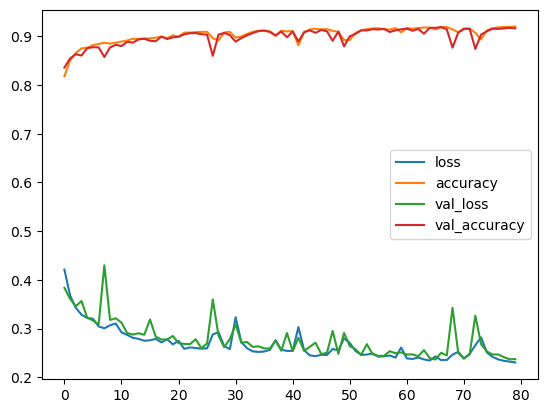

In [50]:
losses.plot()

In [51]:
predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
predictions

array([[ 0.03432484],
       [ 0.11743146],
       [-0.0495428 ],
       ...,
       [ 0.10302791],
       [ 0.14879797],
       [ 0.13866536]], dtype=float32)

In [54]:
test_loss , test_acc = model.evaluate(X_test, y_test, verbose=0)
test_acc

0.9166923761367798

In [55]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
train_acc

0.9208963513374329

In [56]:
print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))

Train: 92.090, Test: 91.669


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log = LogisticRegression()

In [59]:
log.fit(X_train,y_train)

LogisticRegression()

In [60]:
pred1 = log.predict(X_test)

In [61]:
confusion_matrix(y_test,pred1)

array([[4780,  252],
       [ 798,  652]], dtype=int64)

In [62]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5032
           1       0.72      0.45      0.55      1450

    accuracy                           0.84      6482
   macro avg       0.79      0.70      0.73      6482
weighted avg       0.83      0.84      0.82      6482



In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest = RandomForestClassifier()

In [65]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
pred2 = forest.predict(X_test)

In [67]:
confusion_matrix(y_test,pred2)

array([[4993,   39],
       [ 414, 1036]], dtype=int64)

In [68]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5032
           1       0.96      0.71      0.82      1450

    accuracy                           0.93      6482
   macro avg       0.94      0.85      0.89      6482
weighted avg       0.93      0.93      0.93      6482

